In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.simplefilter("ignore")

In [3]:
df = pd.read_csv(r"C:\Users\Brejesh\Downloads\Hotel_Reservations.csv")
df.head(5)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [4]:
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [5]:
df.drop(columns=['Booking_ID'],inplace=True)


In [6]:
df.shape

(36275, 18)

In [7]:
df.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(10275)

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.shape

(26000, 18)

In [11]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [12]:
df.value_counts('repeated_guest')

repeated_guest
0    25148
1      852
Name: count, dtype: int64

In [13]:
num_cols = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights',  
        'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date',  
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests']
      
cat_cols = ['type_of_meal_plan','required_car_parking_space','room_type_reserved','market_segment_type','repeated_guest','booking_status']

In [14]:
len(num_cols)
data = df.copy()

### Data analytics

### UNIVARIATE ANALYSIS

In [15]:
def num_plot_dist(df, num_features):
    fig, axes = plt.subplots(len(num_features),2, figsize=(15,len(num_features)*5))
    if len(num_features)==1:
        axes = [axes]
        
    for i,column in enumerate(num_features):
        sns.histplot(data=df,x = column, ax=axes[i][0], kde=True, palette="Blues")
        axes[i][0].set_title(f"Histogram for {column}")
        
        sns.boxplot(data = df, x= column, ax=axes[i][1], palette="Blues")
        axes[i][1].set_title(f"BOX Plot for {column  }")

plt.tight_layout()
plt.show()
        
        

<Figure size 640x480 with 0 Axes>

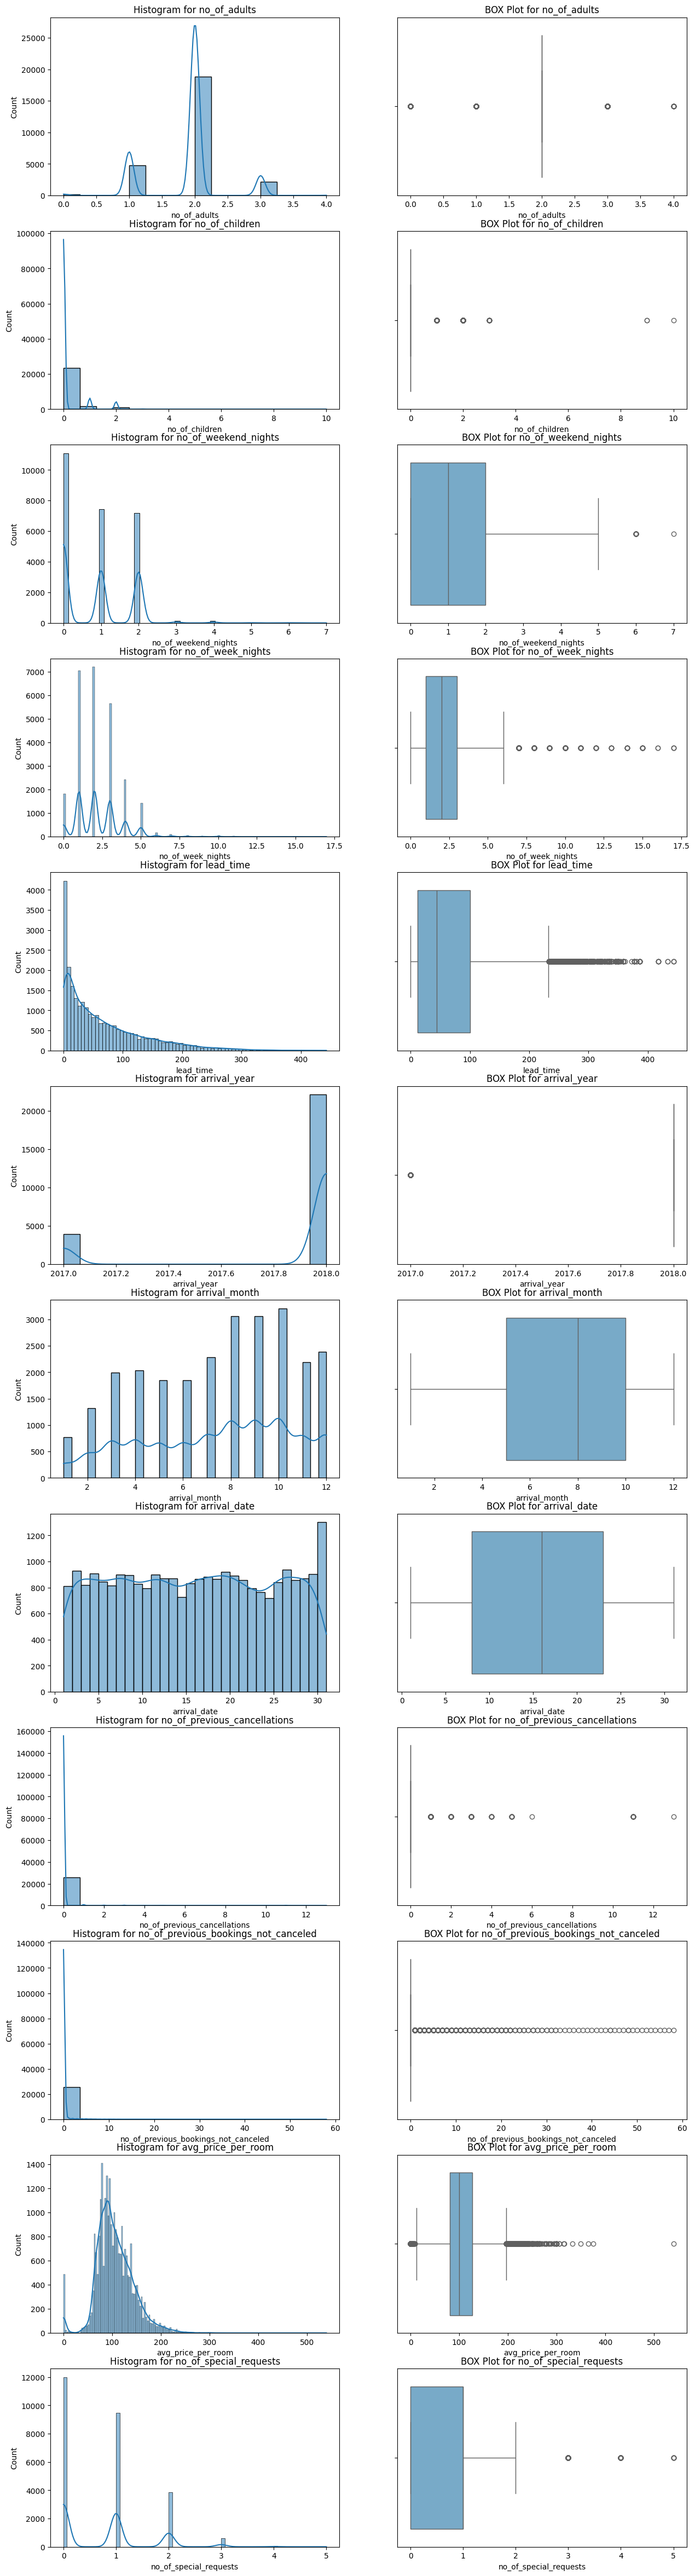

In [16]:
num_plot_dist(data, num_cols)

### Categorical

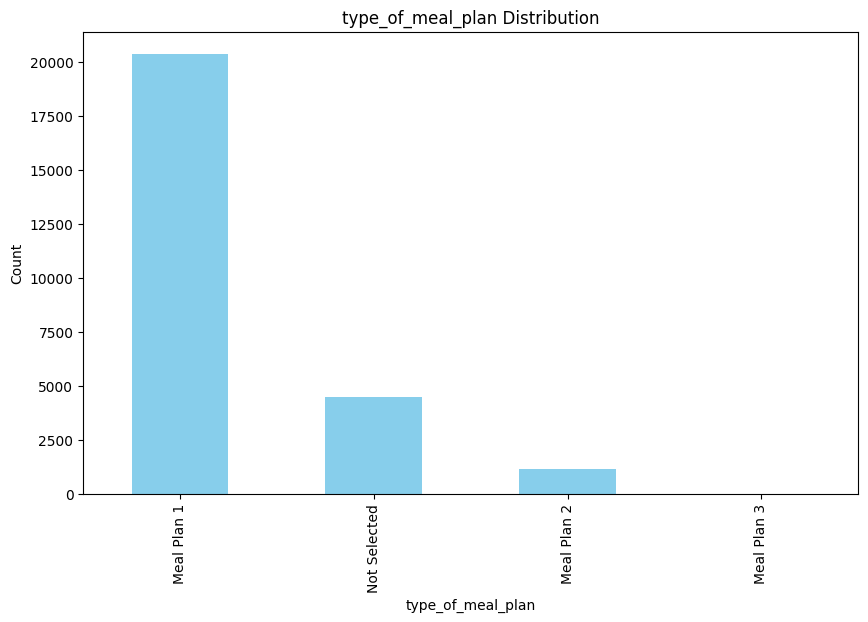

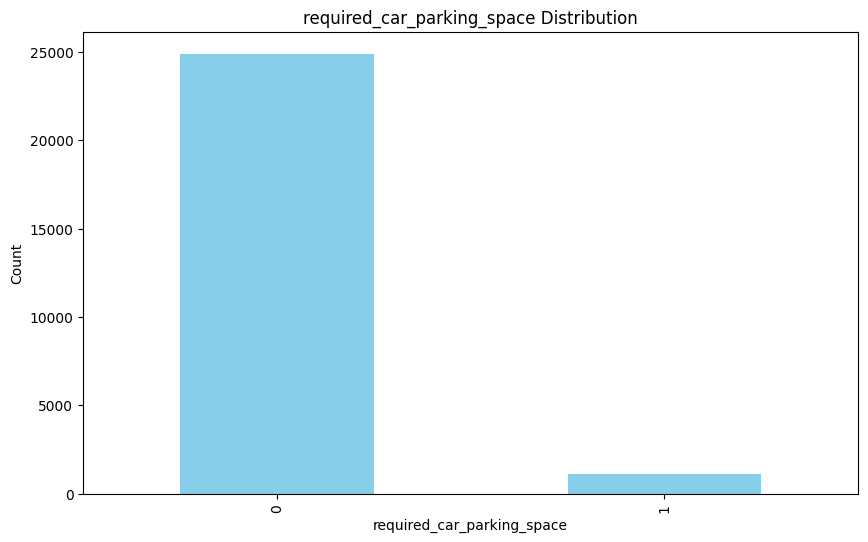

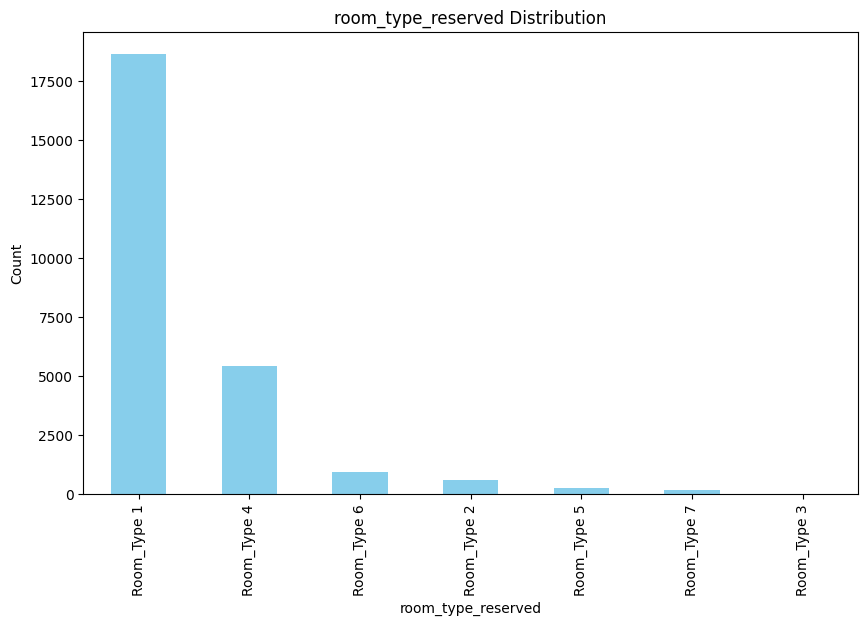

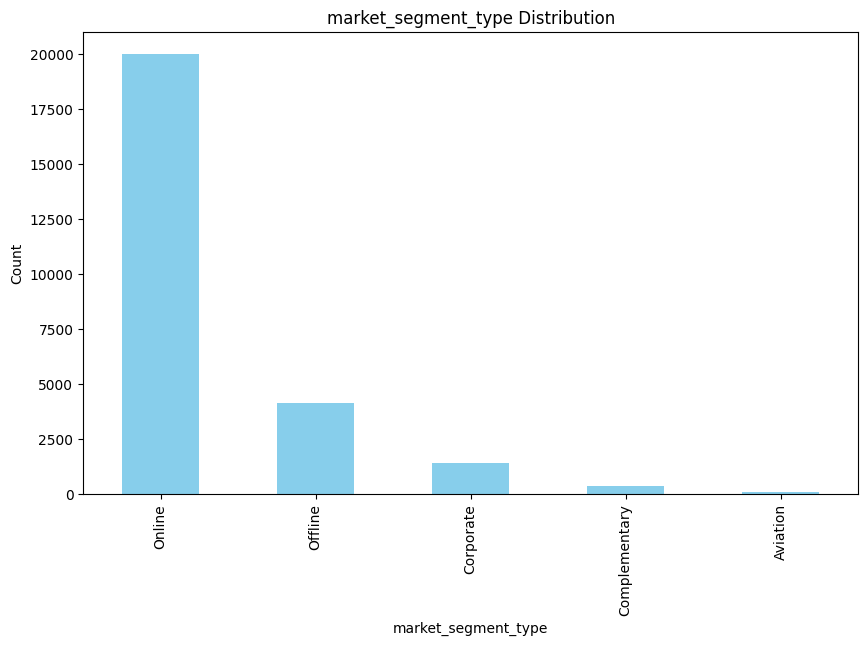

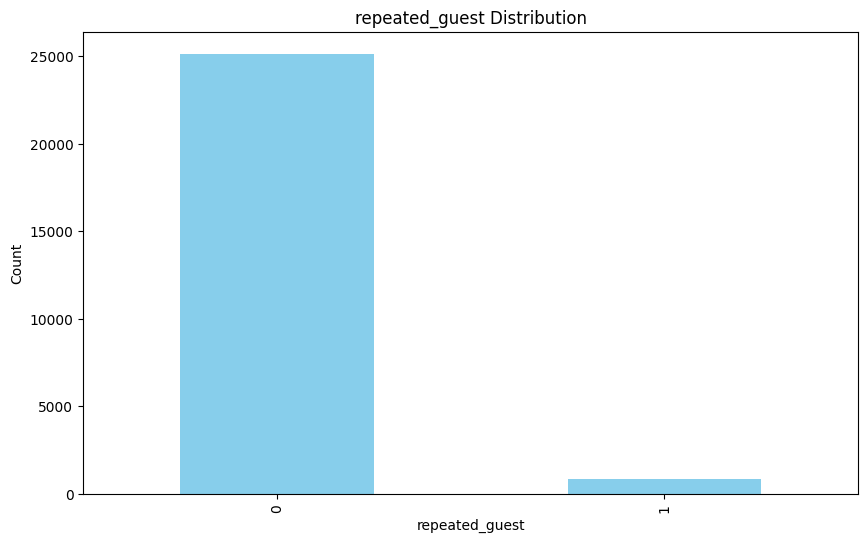

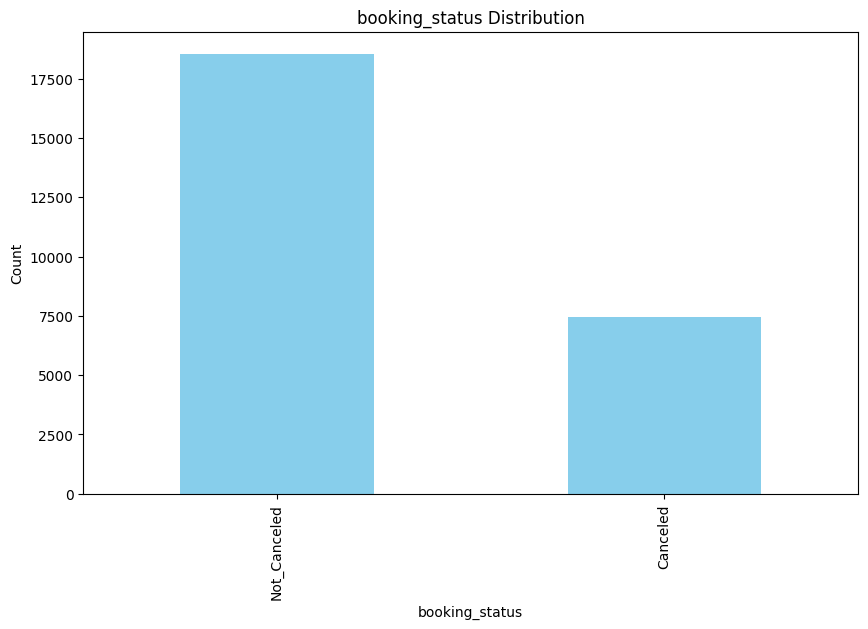

In [17]:
for cat_features in cat_cols:
    plt.figure(figsize=(10,6))
    data[cat_features].value_counts().plot(kind ='bar', color = 'skyblue')
    plt.title(f"{cat_features} Distribution")
    plt.xlabel(cat_features)
    plt.ylabel("Count")
    plt.show()

# Bivariate analysis

In [18]:
def plot_bivariate_num(df,target, num_features):
    num_plots = len(num_features)
    num_rows = (num_plots+1)//2
    
    fig, axes = plt.subplots(num_rows, 2 ,figsize = (15,num_rows*5))
    axes = axes.flatten()
    
    for i, column in enumerate(num_features):
        sns.boxplot(x=target,y=column, ax=axes[i],data =df, palette="Blues")
        axes[i].set_title(f"{column} vs {target}")
    
    plt.tight_layout()
    plt.show()
        
        

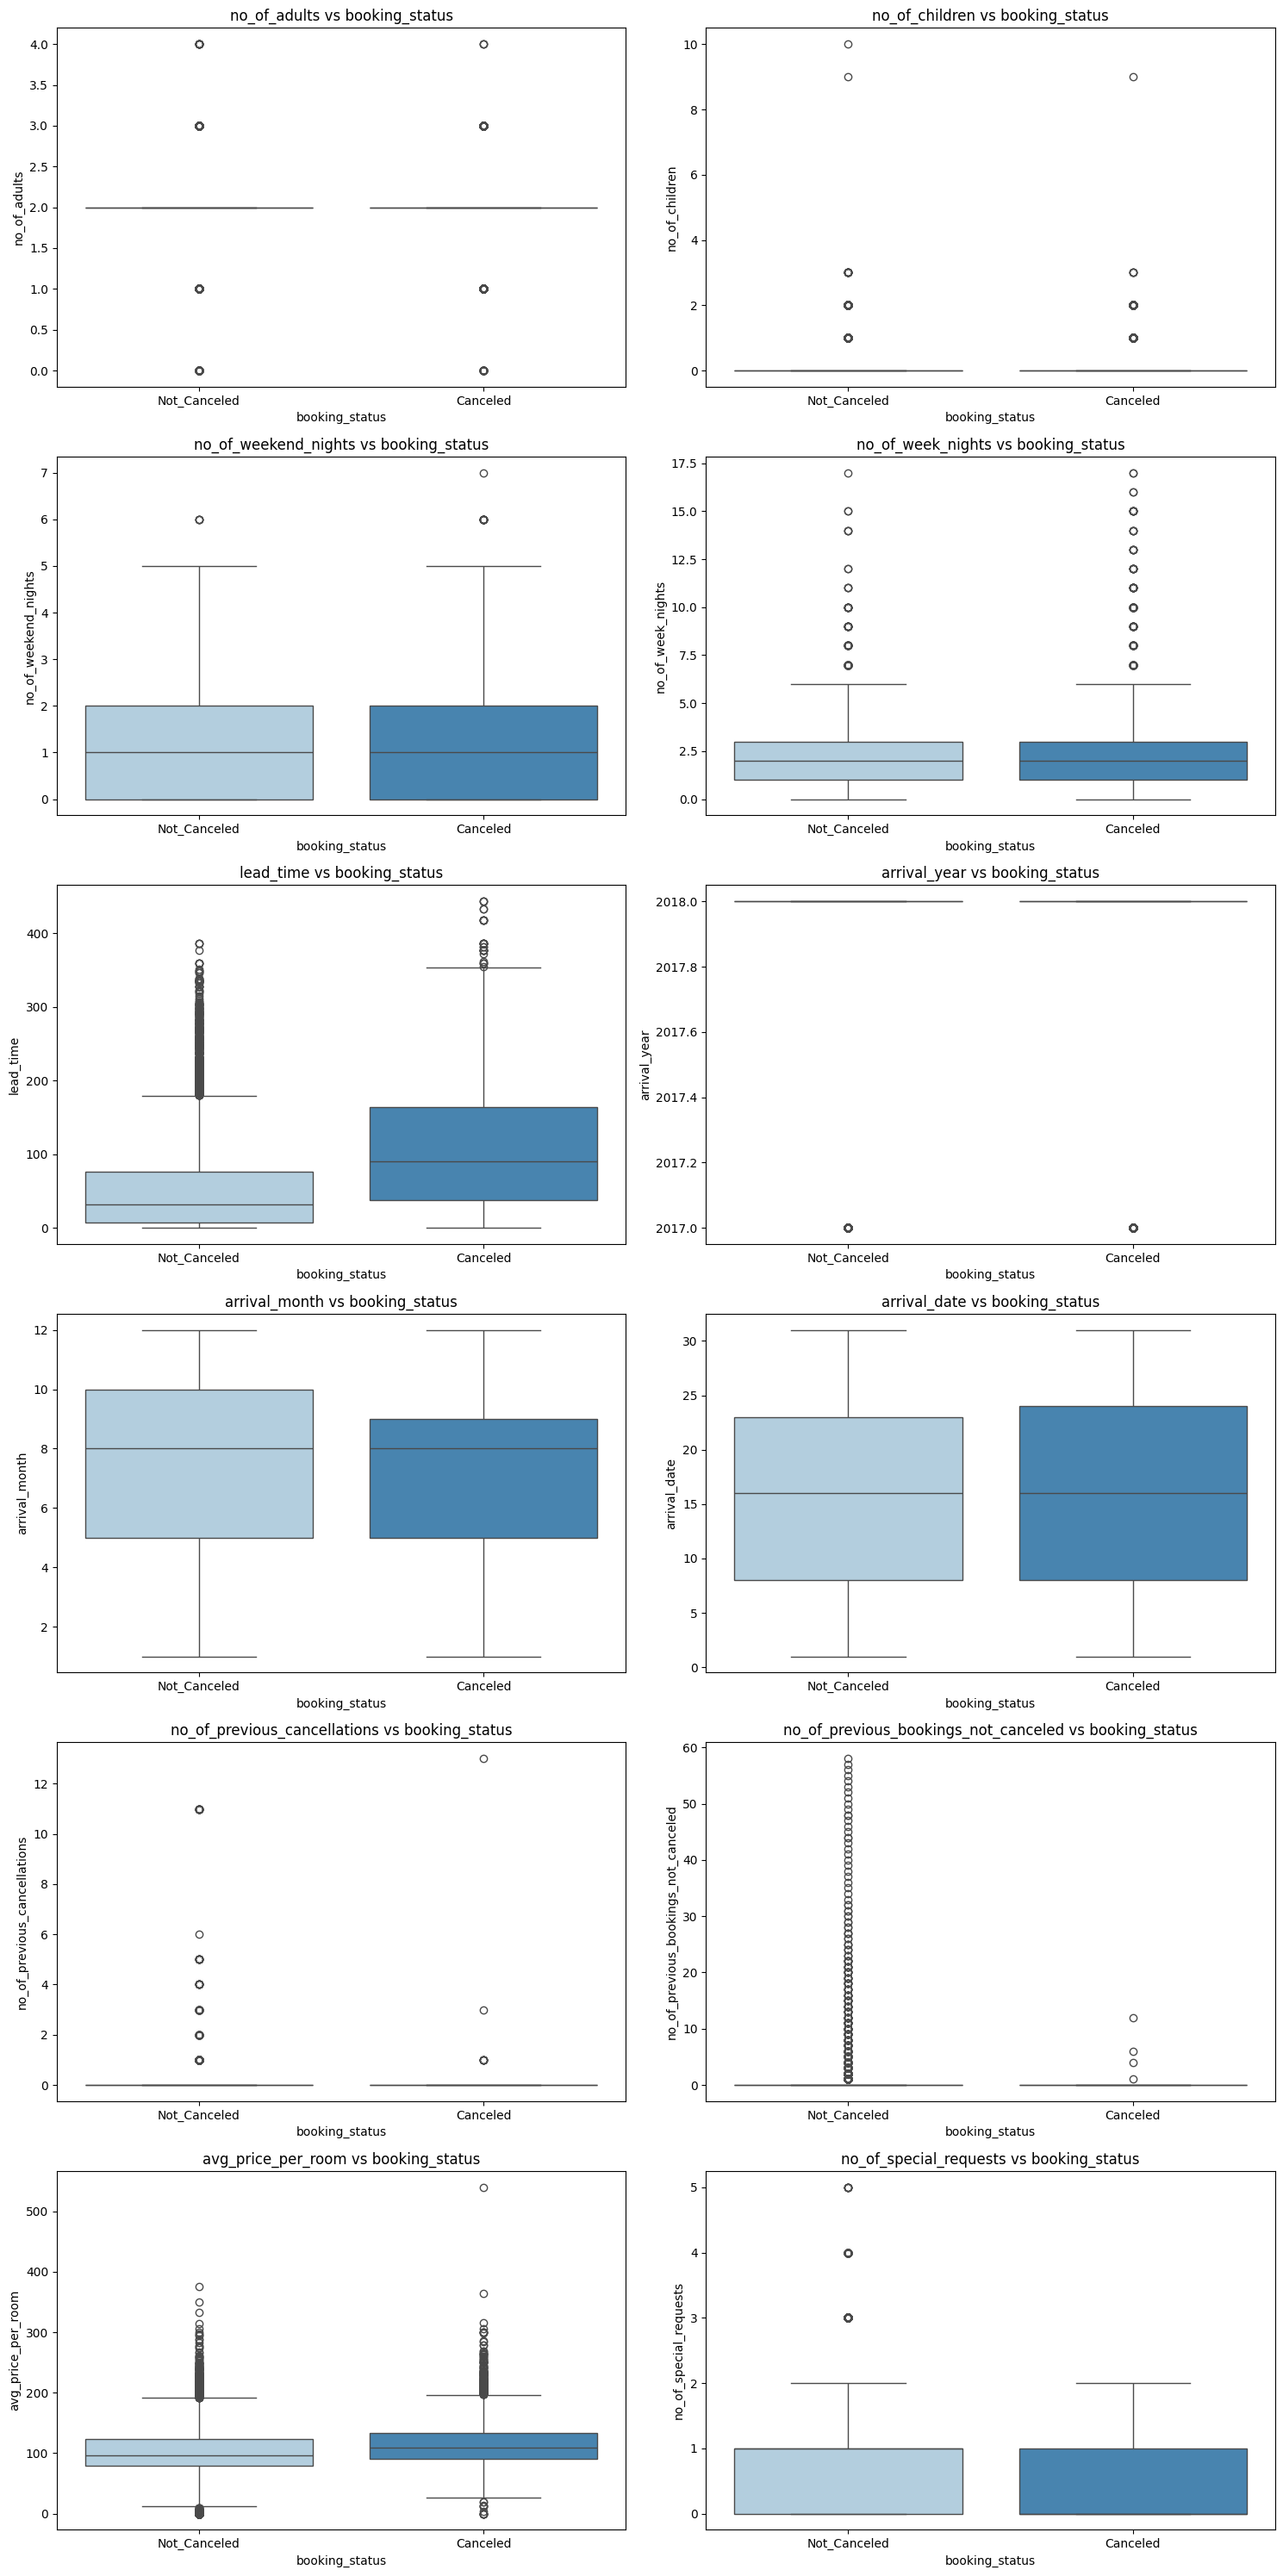

In [19]:
plot_bivariate_num(df,'booking_status', num_cols)

In [20]:
def plot_bivariate_cat(df, target, cat_features):
    num_features = len(cat_features)
    num_rows = (num_features+1)//2
    
    fig, axes = plt.subplots(num_rows, 2 ,figsize = (15,num_rows*5))
    axes = axes.flatten()
    
    for i, feature in enumerate(cat_features):
        sns.countplot(x=feature,hue=target, ax=axes[i],data =df, palette="Set2")
        axes[i].set_title(f"{feature} vs {target}")
        axes[i].tick_params(axis='x', rotation=90)
        
    plt.tight_layout()
    plt.show()

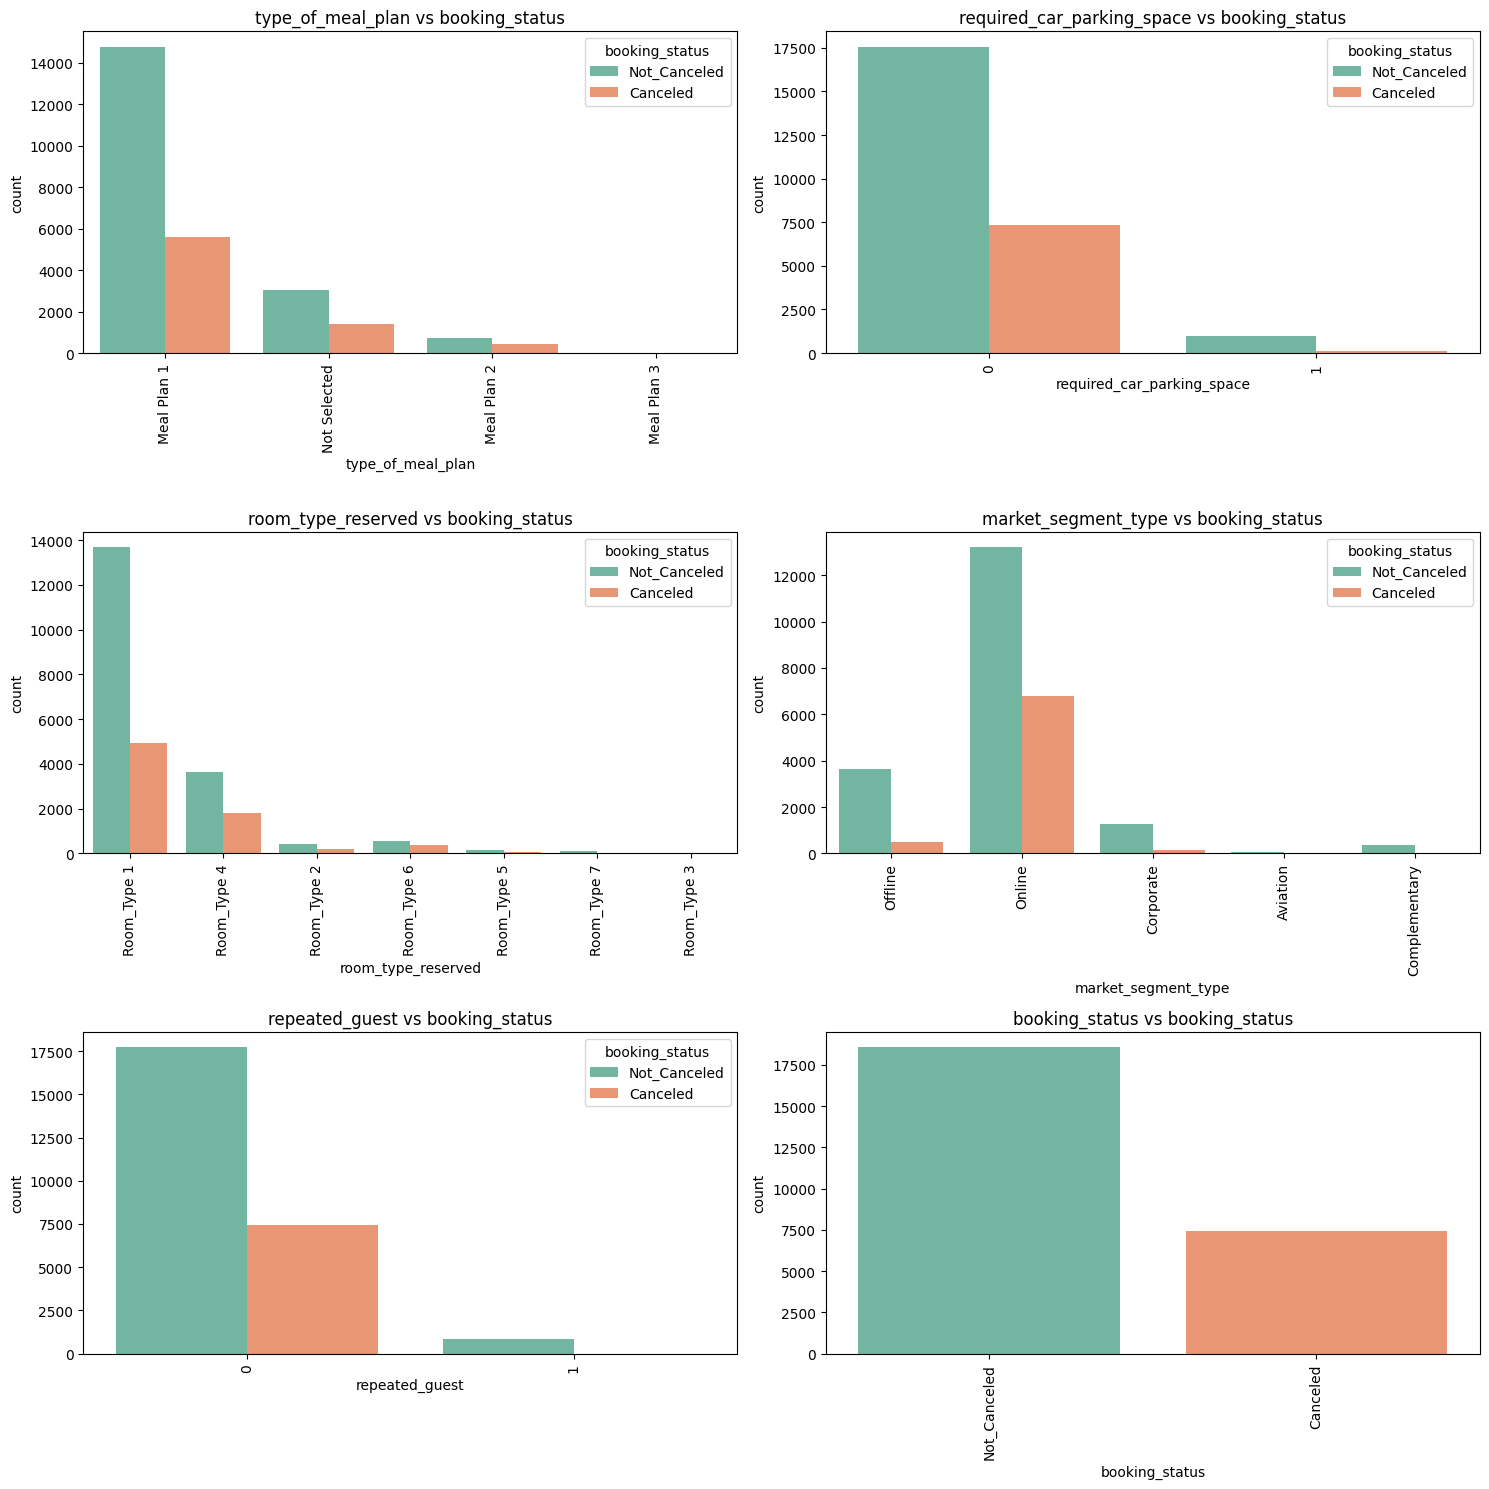

In [21]:
plot_bivariate_cat(data, "booking_status", cat_cols)

### DATA PROCESSING

    

In [22]:
df.info()
#object can't be passed

<class 'pandas.core.frame.DataFrame'>
Index: 26000 entries, 0 to 36273
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          26000 non-null  int64  
 1   no_of_children                        26000 non-null  int64  
 2   no_of_weekend_nights                  26000 non-null  int64  
 3   no_of_week_nights                     26000 non-null  int64  
 4   type_of_meal_plan                     26000 non-null  object 
 5   required_car_parking_space            26000 non-null  int64  
 6   room_type_reserved                    26000 non-null  object 
 7   lead_time                             26000 non-null  int64  
 8   arrival_year                          26000 non-null  int64  
 9   arrival_month                         26000 non-null  int64  
 10  arrival_date                          26000 non-null  int64  
 11  market_segment_type 

### LABEL ENCODING

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
label_encoder = LabelEncoder()
mappings={}

for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])
    mappings[col] = {label:code for label,code in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))}

In [25]:
print(mappings)

{'type_of_meal_plan': {'Meal Plan 1': np.int64(0), 'Meal Plan 2': np.int64(1), 'Meal Plan 3': np.int64(2), 'Not Selected': np.int64(3)}, 'required_car_parking_space': {np.int64(0): np.int64(0), np.int64(1): np.int64(1)}, 'room_type_reserved': {'Room_Type 1': np.int64(0), 'Room_Type 2': np.int64(1), 'Room_Type 3': np.int64(2), 'Room_Type 4': np.int64(3), 'Room_Type 5': np.int64(4), 'Room_Type 6': np.int64(5), 'Room_Type 7': np.int64(6)}, 'market_segment_type': {'Aviation': np.int64(0), 'Complementary': np.int64(1), 'Corporate': np.int64(2), 'Offline': np.int64(3), 'Online': np.int64(4)}, 'repeated_guest': {np.int64(0): np.int64(0), np.int64(1): np.int64(1)}, 'booking_status': {'Canceled': np.int64(0), 'Not_Canceled': np.int64(1)}}


<Axes: >

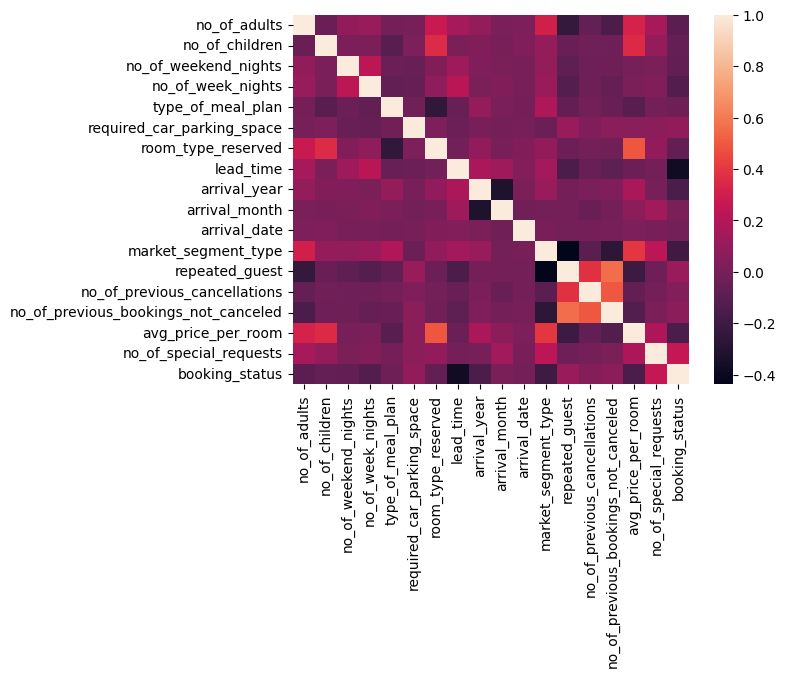

In [26]:
sns.heatmap(df.corr())

### Multicollinearity
    

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [28]:
X= add_constant(df)
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor()]

TypeError: variance_inflation_factor() missing 2 required positional arguments: 'exog' and 'exog_idx'

In [1]:
print("hello")

hello


In [ ]:
li = [1,2,3,45,6,5]
max = []
for x in li:

    

TypeError: 'list' object is not callable